### EcoFOCIpy ADCP QC - 23CKP-15A

- mostly remove >500 cm/s flows in u/v


In [34]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [38]:
xdf = xa.load_dataset('23ckp15a_velein_0038m.nc')

In [39]:
len(xdf.depth)

24

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

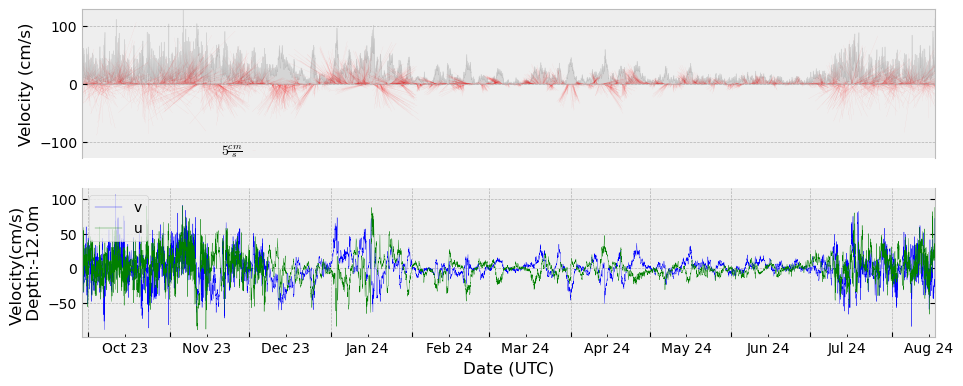

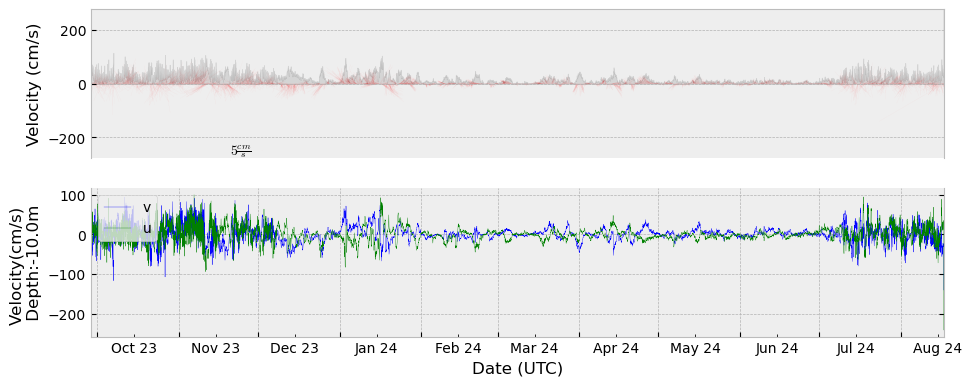

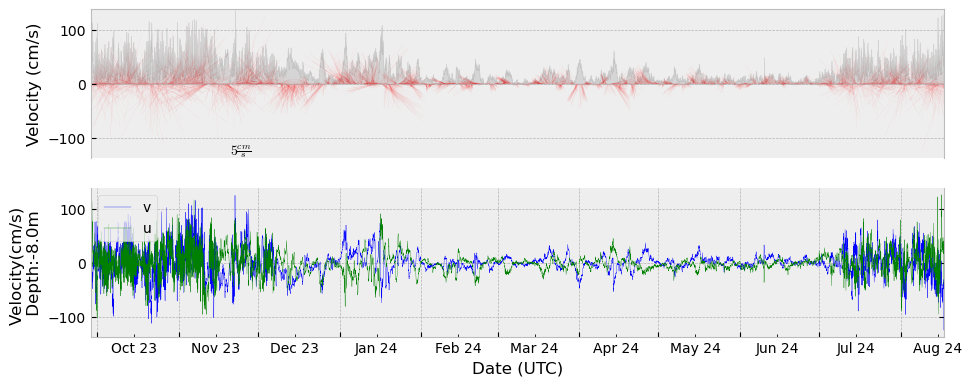

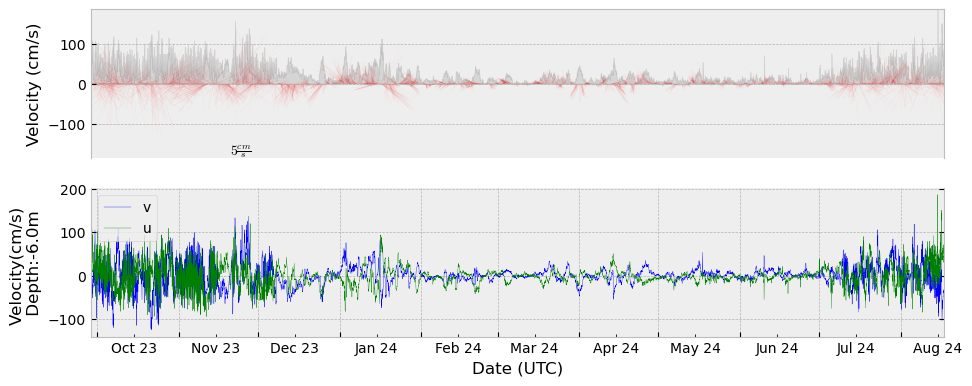

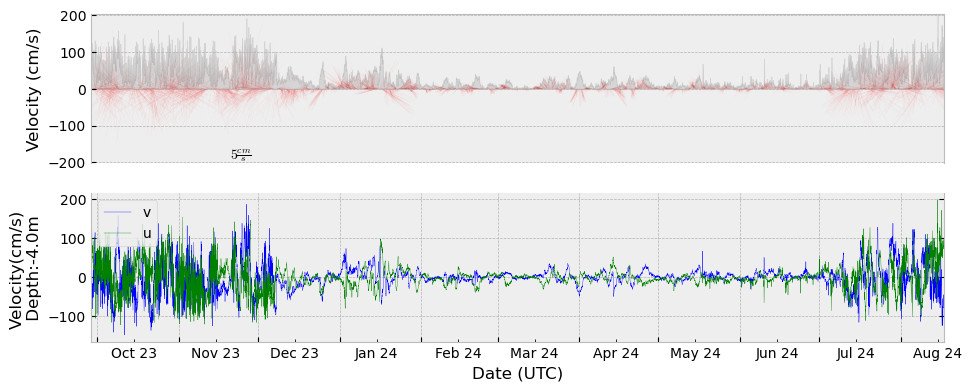

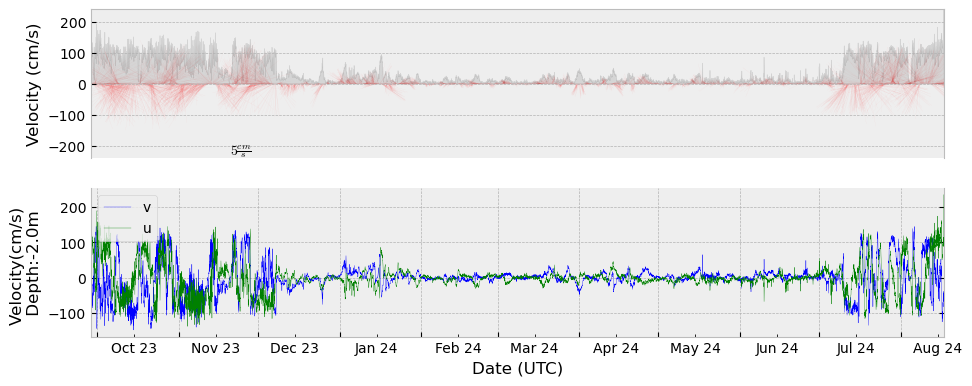

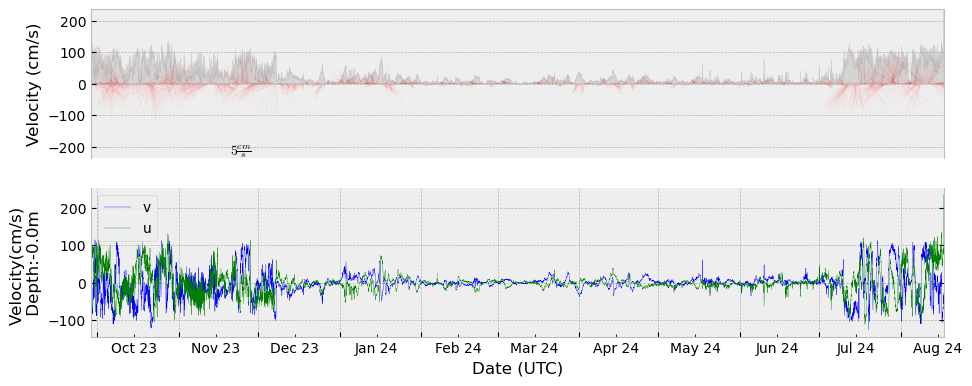

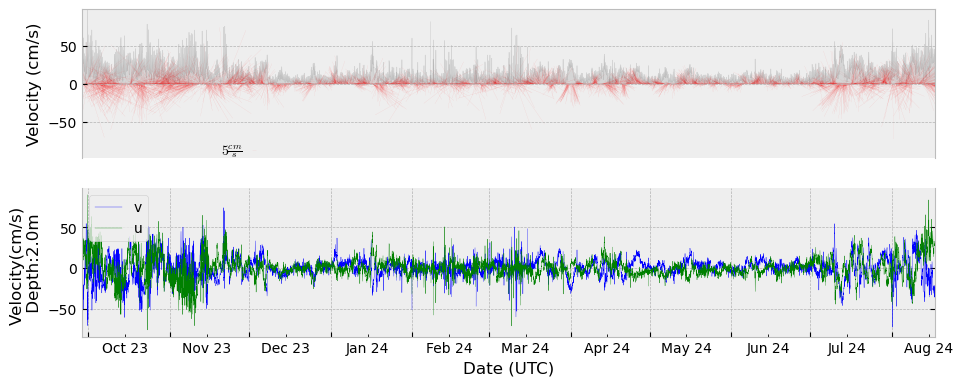

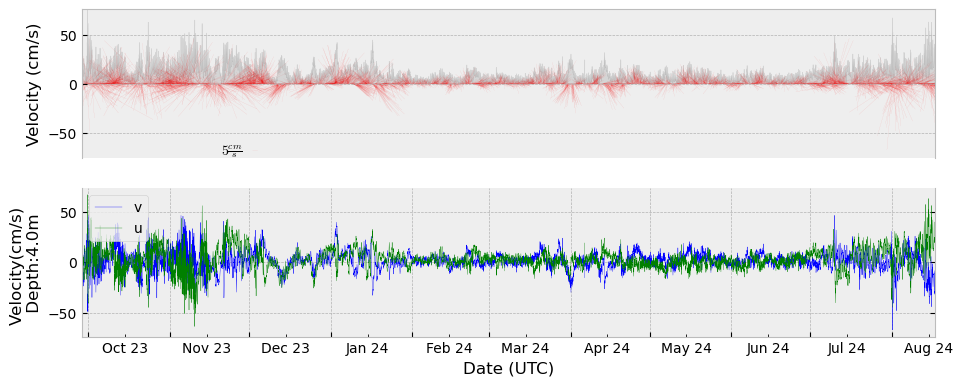

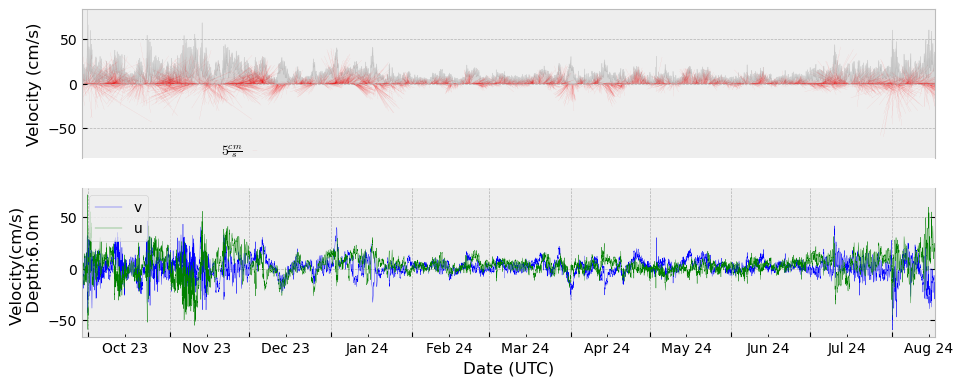

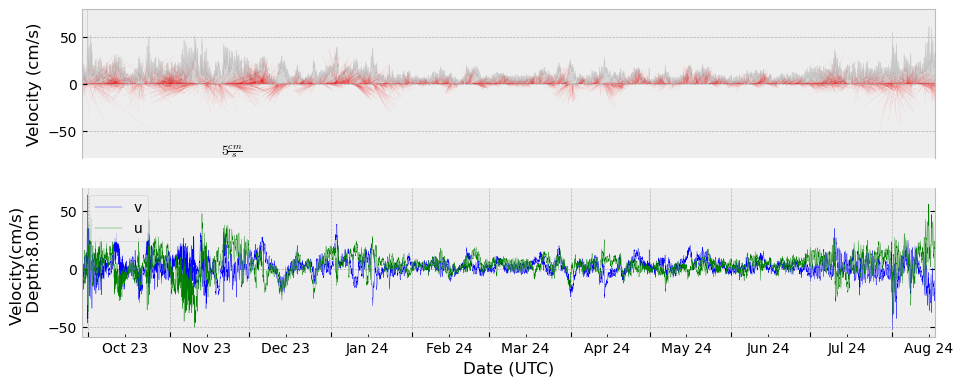

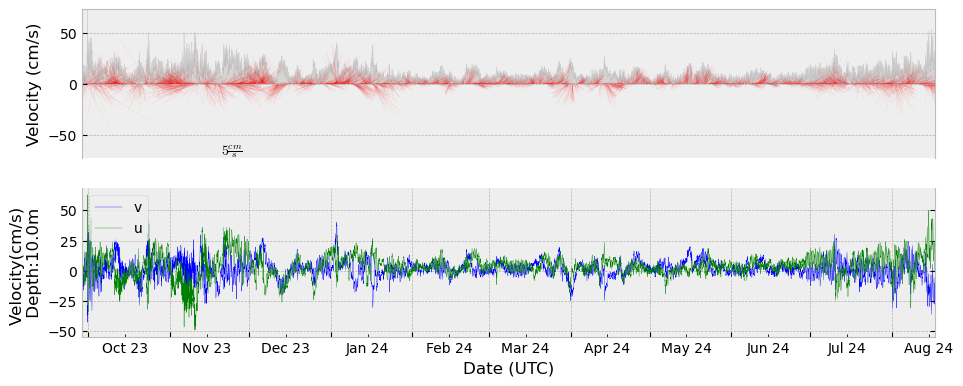

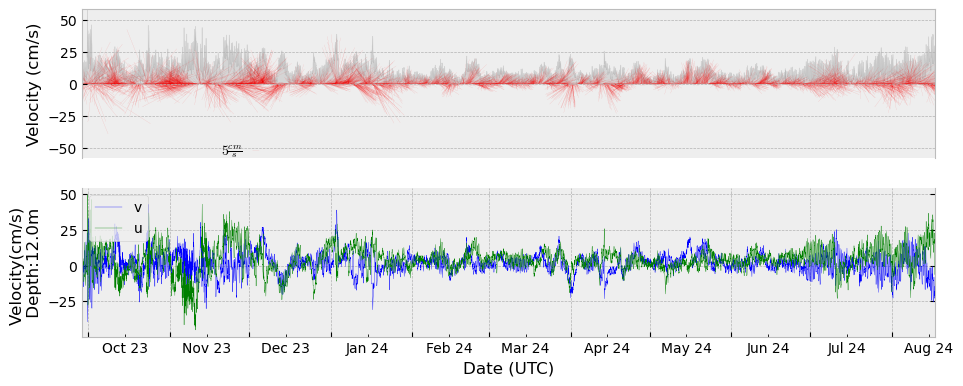

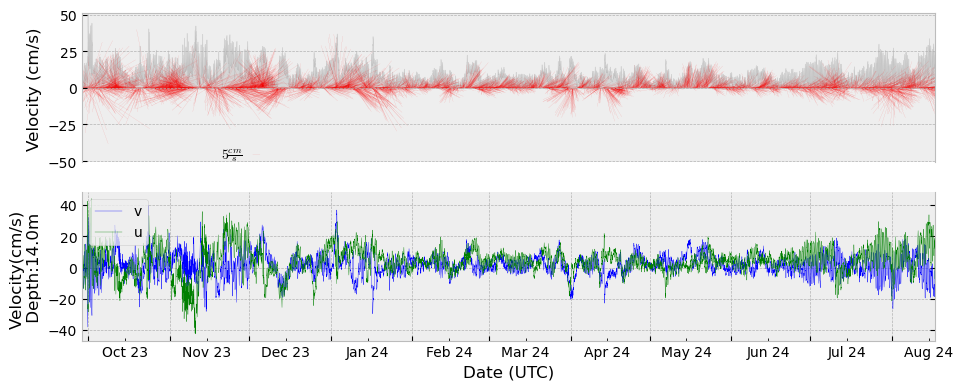

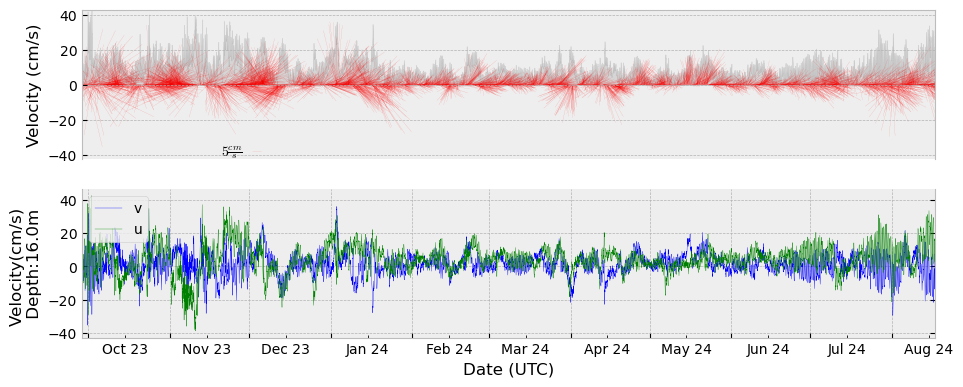

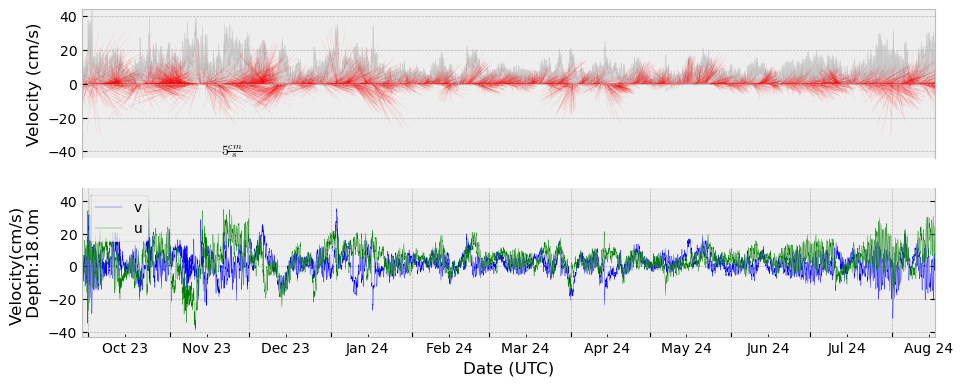

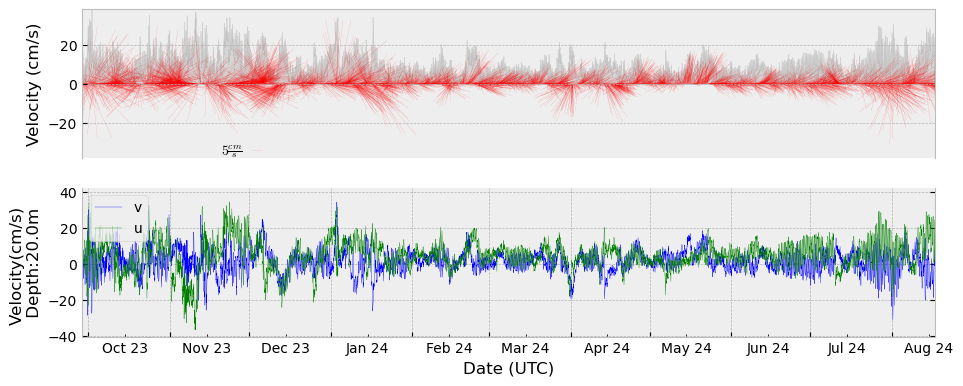

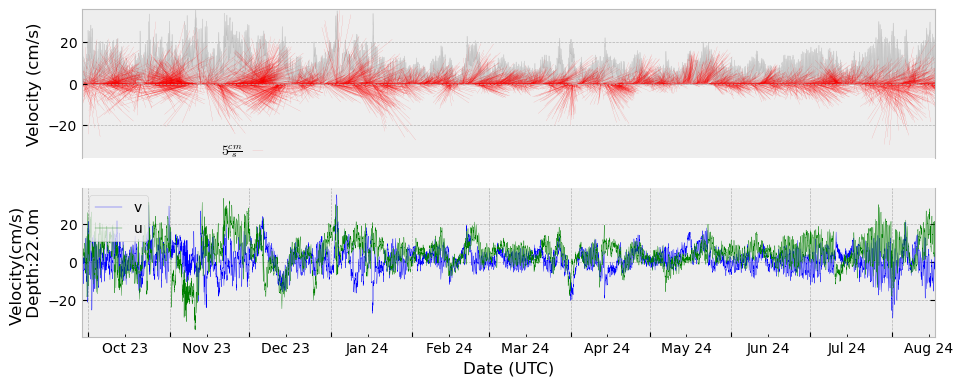

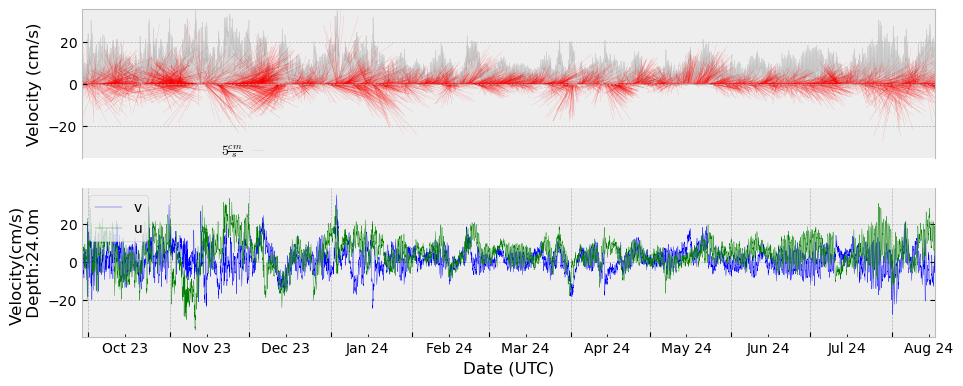

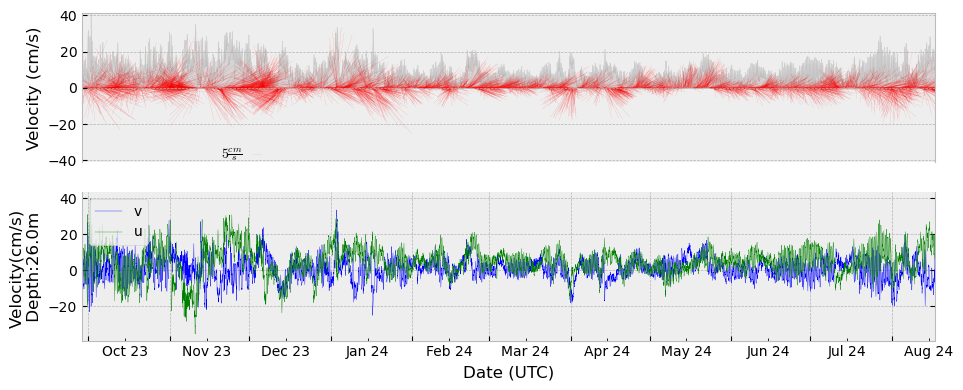

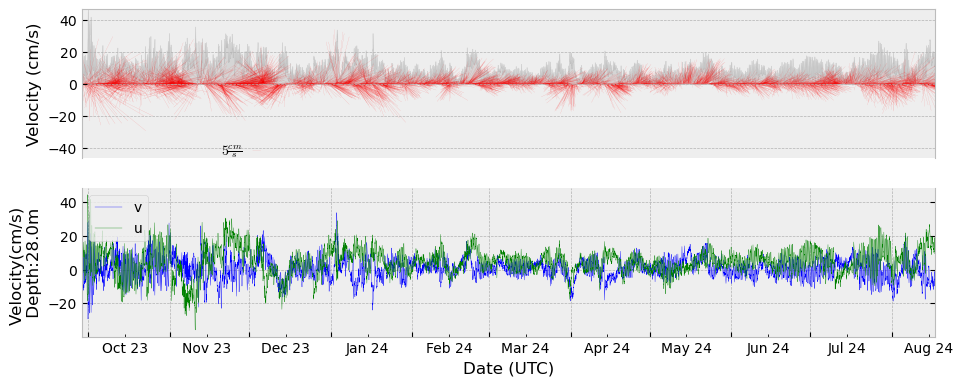

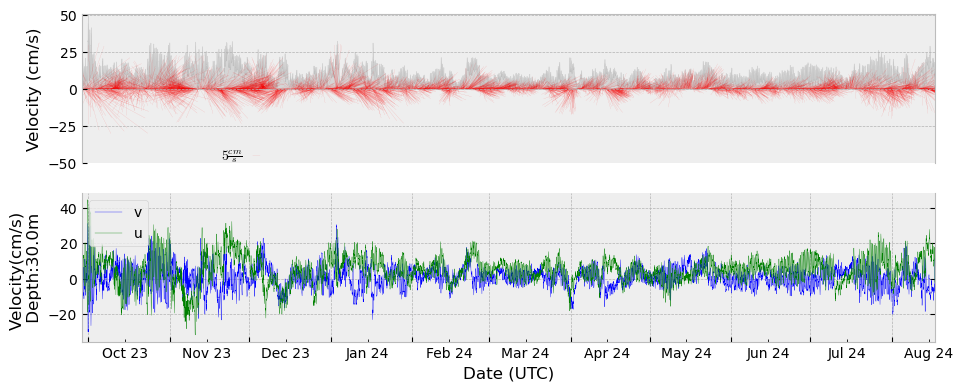

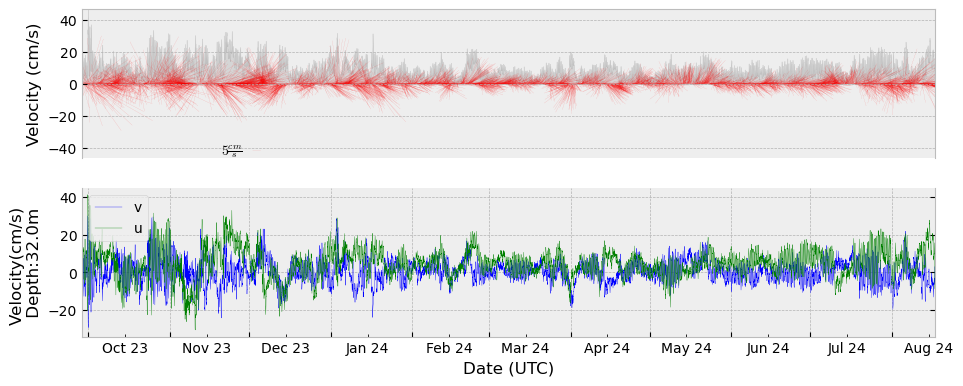

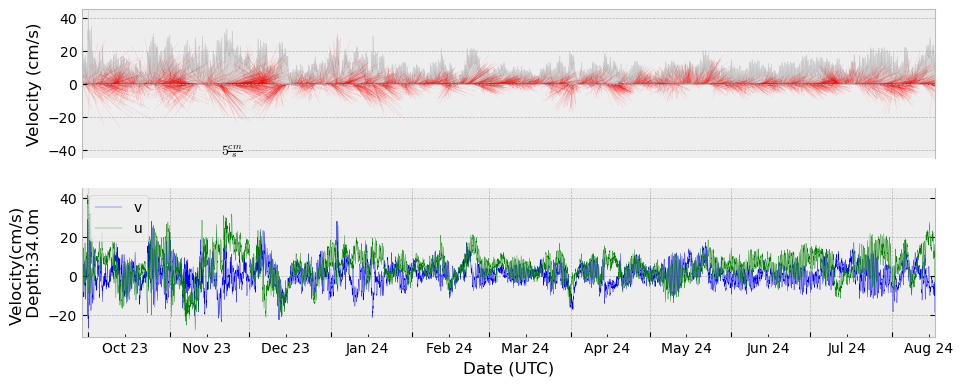

In [42]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [41]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset> Size: 12MB
Dimensions:          (latitude: 1, longitude: 1, time: 7766, depth: 24)
Coordinates:
  * time             (time) datetime64[ns] 62kB 2023-09-28T16:00:00 ... 2024-...
  * depth            (depth) float64 192B -12.0 -10.0 -8.0 ... 30.0 32.0 34.0
  * latitude         (latitude) float64 8B 72.31
  * longitude        (longitude) float64 8B -167.3
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 1MB 5.721 ......
    v_curr_comp      (latitude, longitude, time, depth) float64 1MB -0.06865 ...
    w_curr_comp      (latitude, longitude, time, depth) float64 1MB -5.4 ... 6.7
    w_curr_comp_err  (latitude, longitude, time, depth) float64 1MB -19.2 ......
    agc1             (latitude, longitude, time, depth) float64 1MB 88.0 ... ...
    agc2             (latitude, longitude, time, depth) float64 1MB 85.0 ... ...
    agc3             (latitude, longitude, time, depth) float64 1MB 91.0 ... ...
    agc4             (latitude, longitude, time, depth) float64 1MB 92.0 ... ...
Attributes: (12/13)
    Latitude_DegMMddW:                      72 18.59 N
    Longitude_DegMMddN:                     167 16.250 W
    MooringID:                              23CKP-15A
    platform_deployment_date:               2023-09-28T15:30:00Z
    platform_deployment_cruise_name:        SKQ202312S
    platform_recovery_date:                 2024-08-17T05:02:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             48.0
    date_created:                           2024-10-21T07:54:48Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [28]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

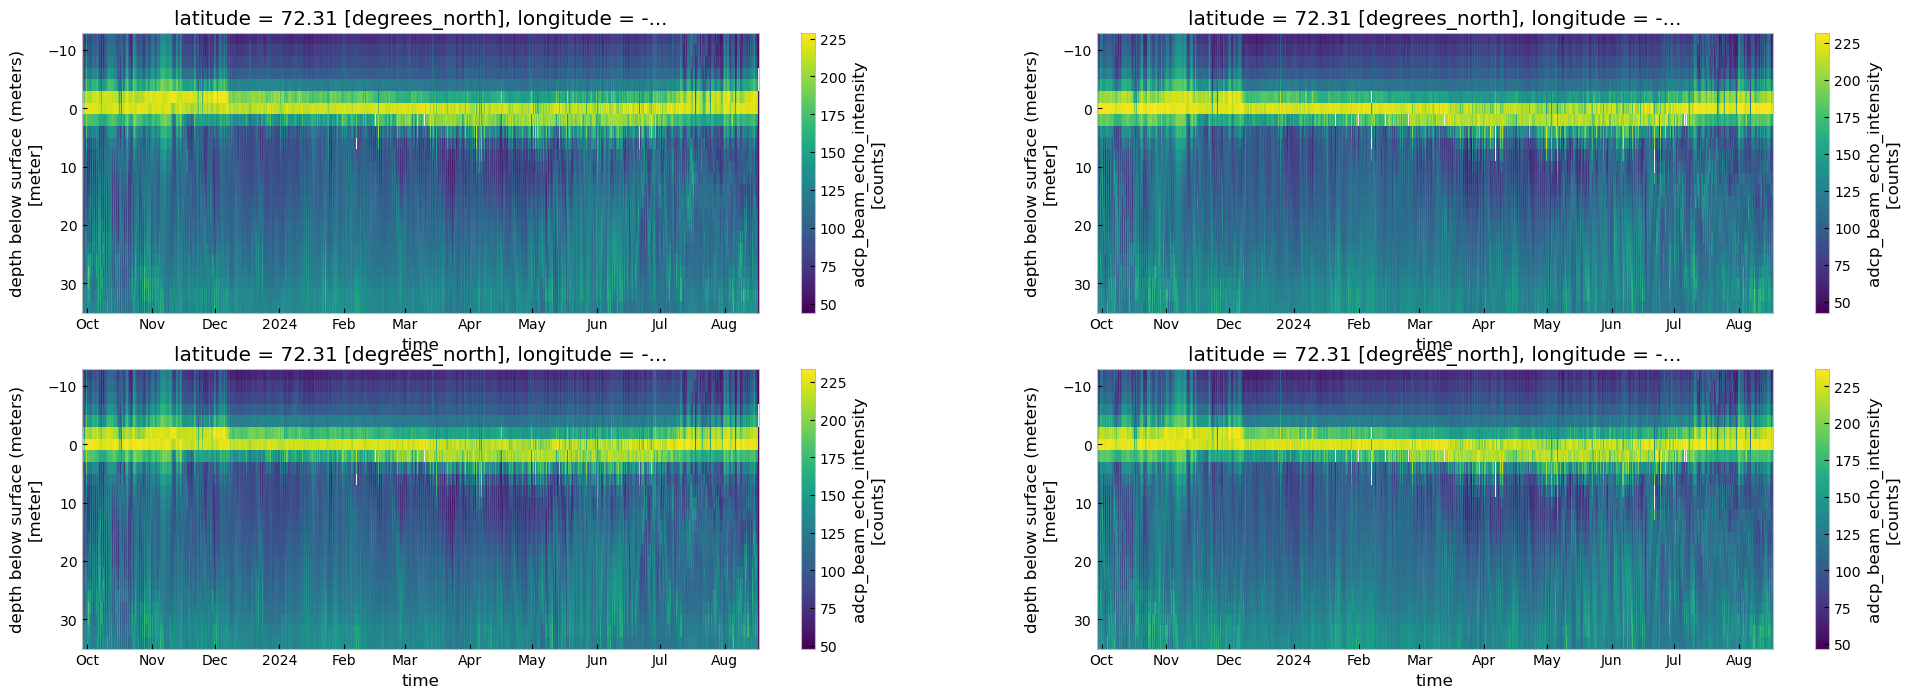

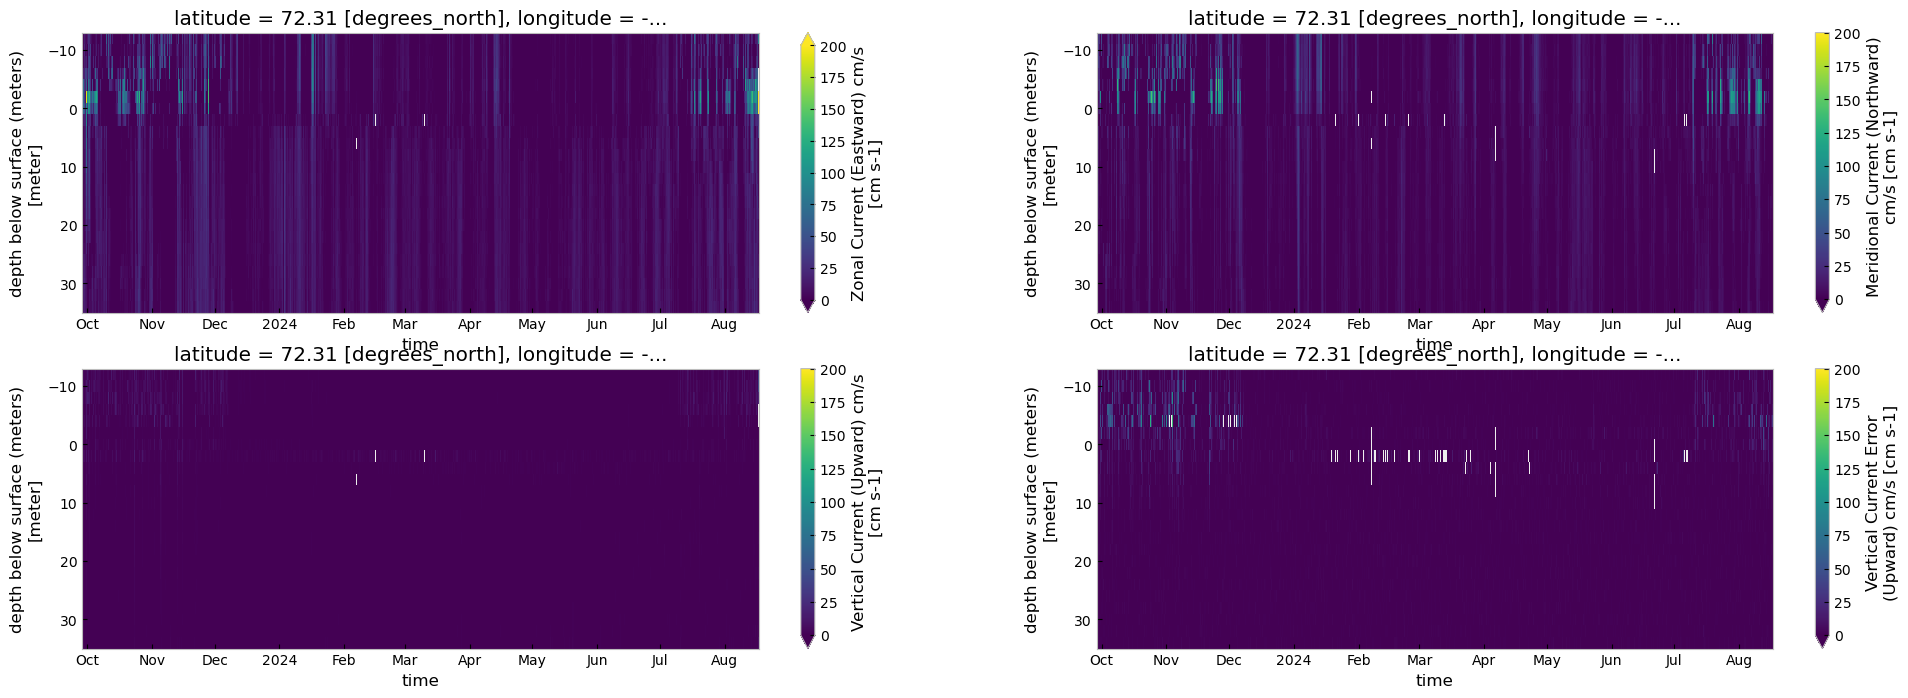

In [43]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [44]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [45]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [46]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [47]:
ixdf.to_netcdf('23ckp15a_0038m.trimmed.nc')

In [48]:
xdf = xa.load_dataset('23ckp15a_0038m.trimmed.nc')

In [49]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [50]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [51]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [52]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

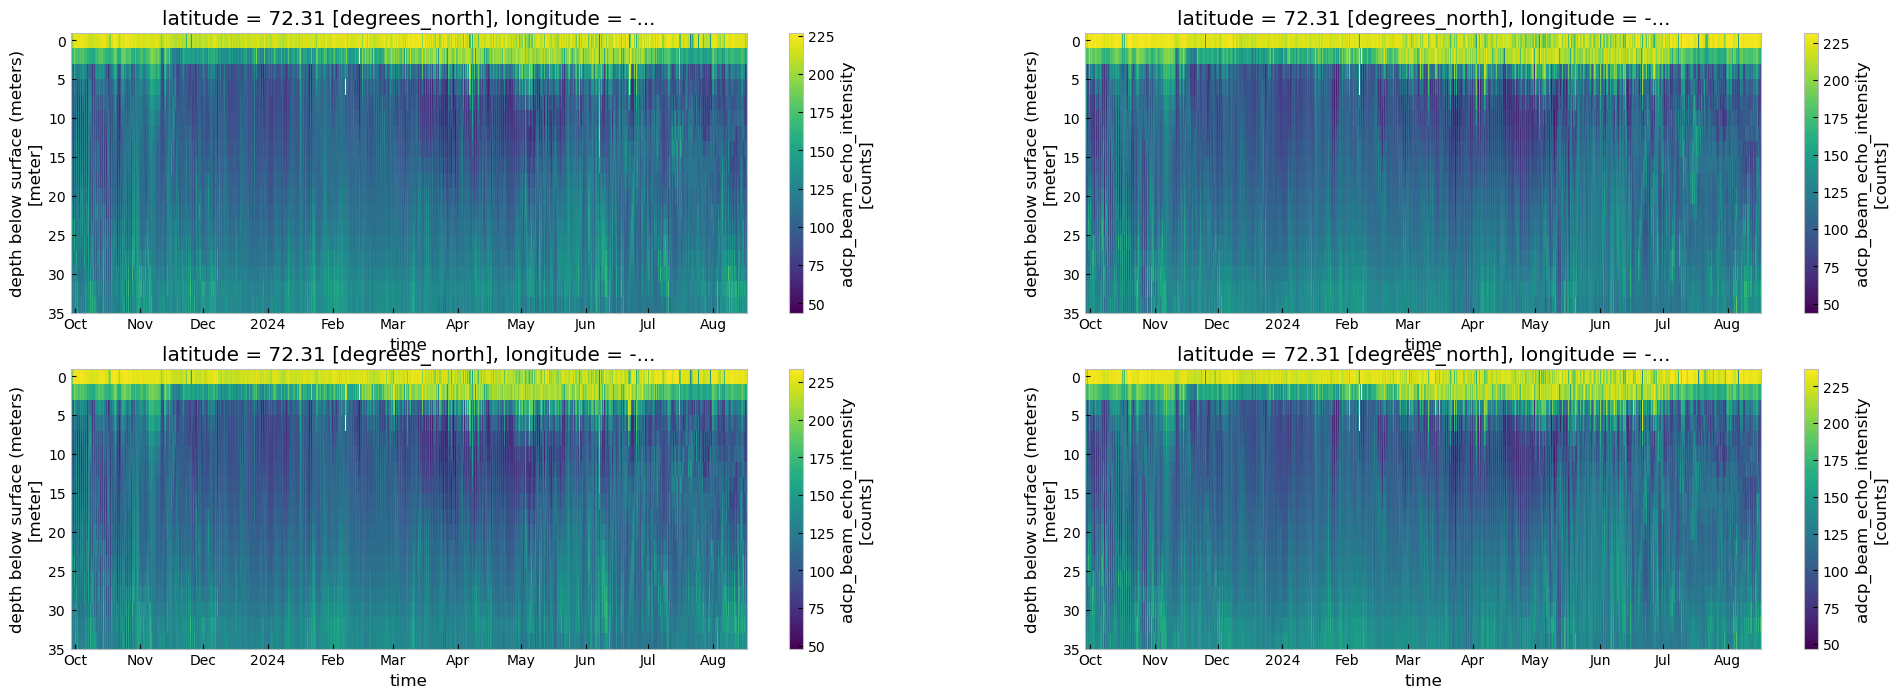

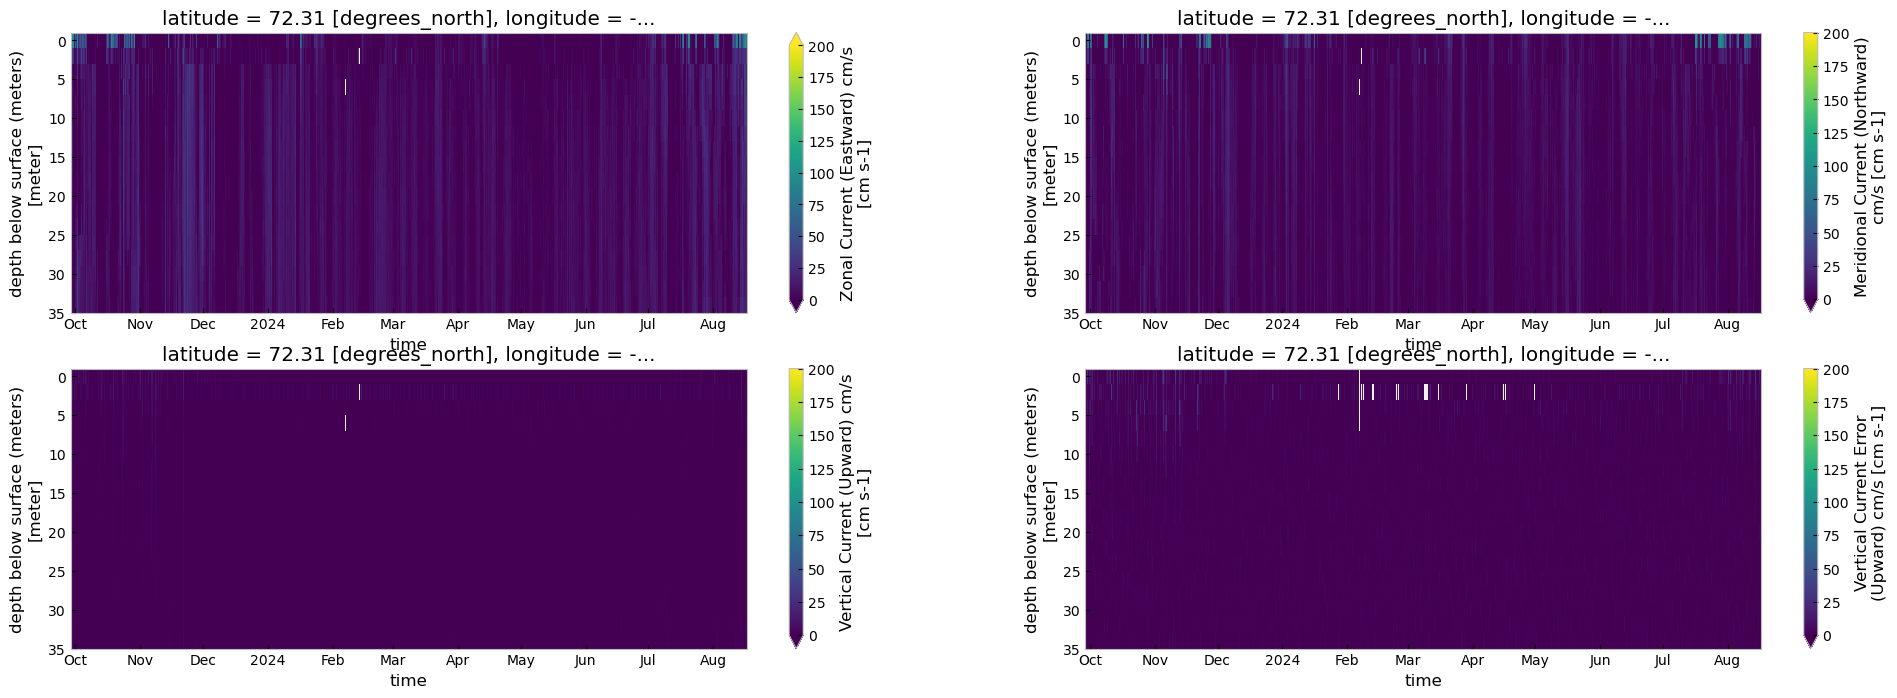

In [53]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [54]:
ixdf.to_netcdf('23ckp15a_0038m.filtered.nc')